In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('zomato.csv')
print(data.shape)
data.head(2)

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<b>Observation</b>

Rate, Phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people) values are missing.

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

<b>description of column</b>

* url: contains the url of the restaurant in the zomato website

* address: contains the address of the restaurant in Bengaluru

* name: contains the name of the restaurant

* online_order: whether online ordering is available in the restaurant or not

* book_table: table book option available or not

* rate: contains the overall rating of the restaurant out of 5

* votes: contains total number of rating for the restaurant as of the above mentioned date

* phone: contains the phone number of the restaurant

* location: contains the neighborhood in which the restaurant is located

* rest_type: restaurant type

* dish_liked: dishes people liked in the restaurant

* cuisines: food styles, separated by comma

* approx_cost(for two people): contains the approximate cost for meal for two people

* reviews_list: list of tuples containing reviews for the restaurant, each tuple

* menu_item: contains list of menus available in the restaurant

* listed_in(type): type of meal

* listed_in(city): contains the neighborhood in which the restaurant is listed

# Data Preprocessing

<b>Column Name Alter and deleting irrelavent column</b>

In [6]:
data.loc[:,['address','location','listed_in(city)']].head()

,address,location,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Banashankari


Here we can see that address,location and listed_in(city) are representing same data, so we can keep one column and drop the others.
* Here we are going to keep location and drop address and listed_in(city)
* URL and Phone columns are added , to drop.

In [7]:
data.drop(columns = ['address','listed_in(city)','url','phone'], inplace=True)

In [8]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

<b>Handling Duplicates</b>

In [9]:
# checking for duplicates
print(data.duplicated().sum(),'are duplicate.')

9809 are duplicate.


In [10]:
data.drop_duplicates(inplace=True)

<b>Handling the Null calues</b>

In [11]:
((data.isnull().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

50% of dish_liked , 10% of rate , location .03% , rest_type .41% have Null values.

<b>Understanding the rate column</b>

In [12]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

we can replace 'New' and '-' with null value

In [13]:
# Replacing 'New' and '-'
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [14]:
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda x : x.replace('/5',''))
data['rate'] = data['rate'].astype(float)

In [16]:
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

<b>lets handle Review_list</b>

In [17]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet


In [18]:
type(data.reviews_list[0])

str

In [19]:
### ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.

# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [20]:
# Sample
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

* We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
* We can use this values and filled up 'Rate' colomn.

In [21]:
# extract the rate for the first input from the review column

extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

review for particular restaurant, we can use mean value.

In [22]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

In [23]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


lets do it for all

In [24]:

def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # checking X is not null and not more then 1 rate.
    if not x or len(x) <= 1:
        return None
    # from X removing the 'Rated' text and converting it to string to float
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

# creating review_rate column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))


In [25]:
data[['rate','review_rate']].head(10)

,rate,review_rate
0,4.1,4.1
1,4.1,3.6
2,3.8,3.1
3,3.7,3.7
4,3.8,4.0
5,3.8,NaN
6,3.6,5.0
7,4.6,4.4
8,4.0,3.3
9,4.2,4.1


* almost same, we can replace missing value with this new adjustment.

In [26]:
data.rate.isna().sum()

5914

In [27]:
## https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

## finding rate = NaN and review_rate == not NaN

data.query('rate != rate & review_rate == review_rate')[:3]


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),review_rate
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150,"[(Rated 4.0, RATED\n cost for chicken rolls i...",[],Delivery,4.5
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[(Rated 1.0, RATED\n Do not order anything. T...",[],Delivery,1.0
110,Hari Super Sandwich,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[(Rated 1.0, RATED\n I have been here many ti...",[],Delivery,1.0


In [28]:
# https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe


## finding index where rate==NaN and review_rate== not NaN
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate']

In [29]:
data.rate.isna().sum()


4861

1000 NULL values reduced

In [30]:
# review_rate column job is done lets remove the column
data.drop(columns='review_rate',axis=1,inplace=True)

In [31]:
((data.isna().sum()/data.shape[0])*100).round(2)


name                            0.00
online_order                    0.00
book_table                      0.00
rate                           11.60
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

lets remove missing values, from 'rate' and 'average_cost' colomn

In [32]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [33]:
data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

lest remove cuisines missing values

In [34]:
data=data[data.cuisines.isna()==False]

In [35]:
## rename 'approx_cost(for two people)' to 'average_cost'
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [36]:
data.isnull().sum()

name                   0
online_order           0
book_table             0
rate                   0
votes                  0
location               0
rest_type            121
dish_liked         15269
cuisines               0
average_cost           0
reviews_list           0
menu_item              0
listed_in(type)        0
dtype: int64

In [37]:

# https://stackoverflow.com/questions/51552554/not-working-if-else-in-one-line-python

# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

print(data.dish_liked[:2])
print('\n')


menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
print("length of menu list :- ",len(menu_list))

# Now collect the unique dish name 
menu_set = set(menu_list)

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object


length of menu list :-  118363


like how we replace review_rate into missing rate values can we do the same here.

<b> replacing missing 'dish_liked' with 'menu_list' values</b>

In [38]:
# https://stackoverflow.com/questions/2365411/convert-unicode-to-ascii-without-errors-in-python        
# https://stackoverflow.com/questions/12053107/test-a-string-if-its-unicode-which-utf-standard-is-and-get-its-length-in-bytes
# https://stackoverflow.com/questions/48006240/how-to-convert-unicode-string-into-normal-text-in-python
# https://stackoverflow.com/questions/4987327/how-do-i-check-if-a-string-is-unicode-or-ascii

def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')

data['process_text'] = data.reviews_list.apply(lambda x: clear_text(x))
data['process_text'].head()


0    RATED\n  A beautiful place to dine in.The inte...
1    RATED\n  Had been here for dinner with family....
2    RATED\n  Ambience is not that good enough and ...
3    RATED\n  Great food and proper Karnataka style...
4    RATED\n  Very good restaurant in neighbourhood...
Name: process_text, dtype: object

we need to cleanup text because it content different characters "�����,:-\n\n1, 3.5/5" . This kind of characters are present in text, we need to clean up those characters.

In [39]:
#removing all above mentioned characters

data['process_text'] = data.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())

In [40]:
# sample of processed text
data.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

In [41]:
data.dish_liked.nunique()


5250

In [42]:
# converting dish_liked to lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [43]:
#we are using 'menu_set' and 'process_text' data. Put it into liked dishes list.
menu_set.intersection(data.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [44]:
# creating a new column for the reviewed dish
data['dish_n_review'] = data.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [45]:
# https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
32901,NaN,"kheer, halwa"
44323,NaN,"rice, shawarma, tikka, prawn, chicken"
6479,NaN,
11046,NaN,rice
50112,NaN,"coffee, cappuccino"


In [46]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

* we can delete menu_list and menu_set

In [47]:
del menu_list
del menu_set

In [48]:
# let's drop the dish_n_review column now
data.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [49]:
data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
process_text         0
dtype: int64

# Data Visualization

Text(0, 0.5, 'No of Restaurants')

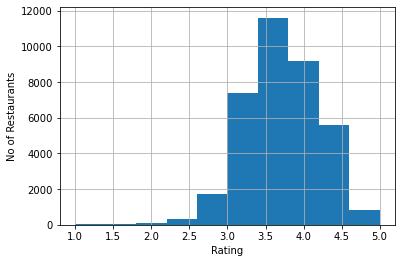

In [50]:
data['rate'].hist()
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')

In [51]:
print("Average rating for zomato in banglore is : ",data.rate.mean())

Average rating for zomato in banglore is :  3.7208921589921835


<b> Top 20 restaurant in banglore </b>

In [52]:
data['name'].value_counts().head()

Onesta               85
Cafe Coffee Day      84
Empire Restaurant    69
Kanti Sweets         66
Just Bake            62
Name: name, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

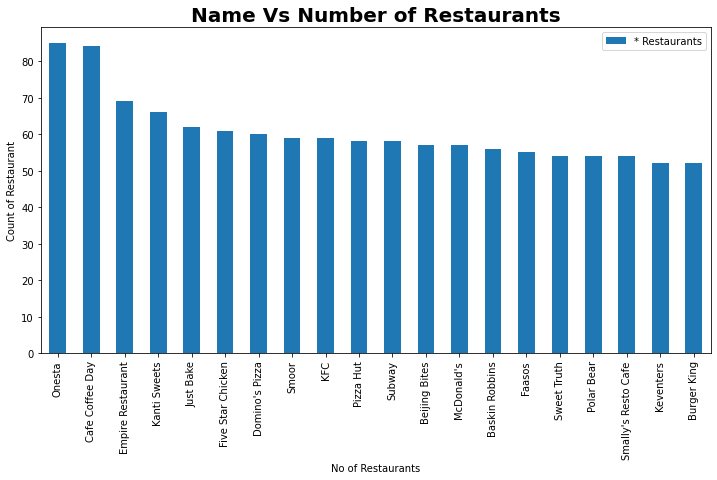

In [53]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')

ax.legend(['* Restaurants'])

plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

* 'Onesta' has highest count amount all

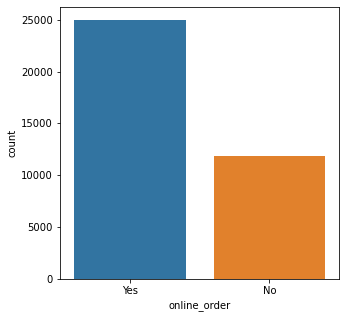

In [54]:
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)


* Most of the orders are online compare to dine-in

<b>Number of restaurents having options to book table .</b>

<AxesSubplot:xlabel='book_table', ylabel='count'>

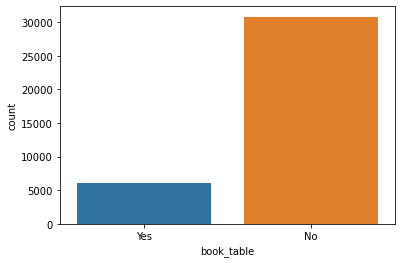

In [55]:
sns.countplot(data['book_table'])

In [56]:
data.book_table.value_counts()

No     30799
Yes     6033
Name: book_table, dtype: int64

Most restaurent do not have book table facility

Text(0.5, 1.0, 'Table booking option')

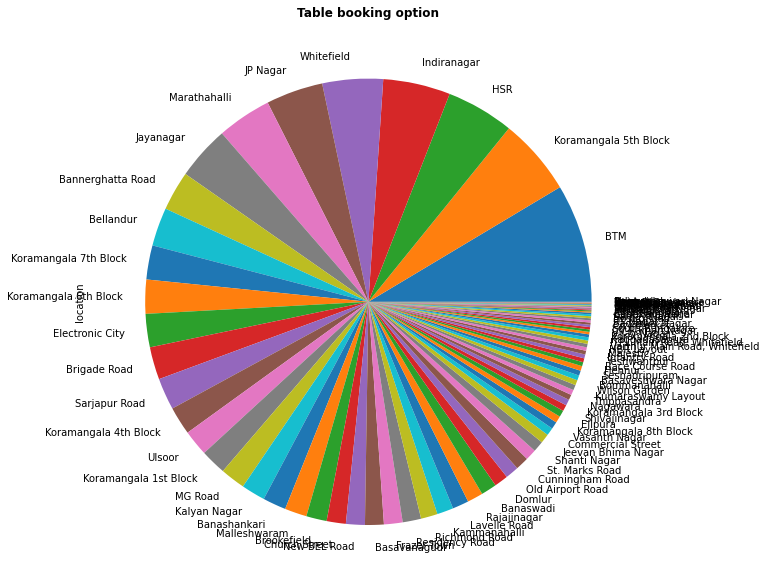

In [57]:
plt.figure(figsize=(10,40))
ax =data.location.value_counts().plot(kind='pie')
plt.title('Table booking option', weight='bold')

<b>Its looks very complicated so we draw a BAR graph</b>

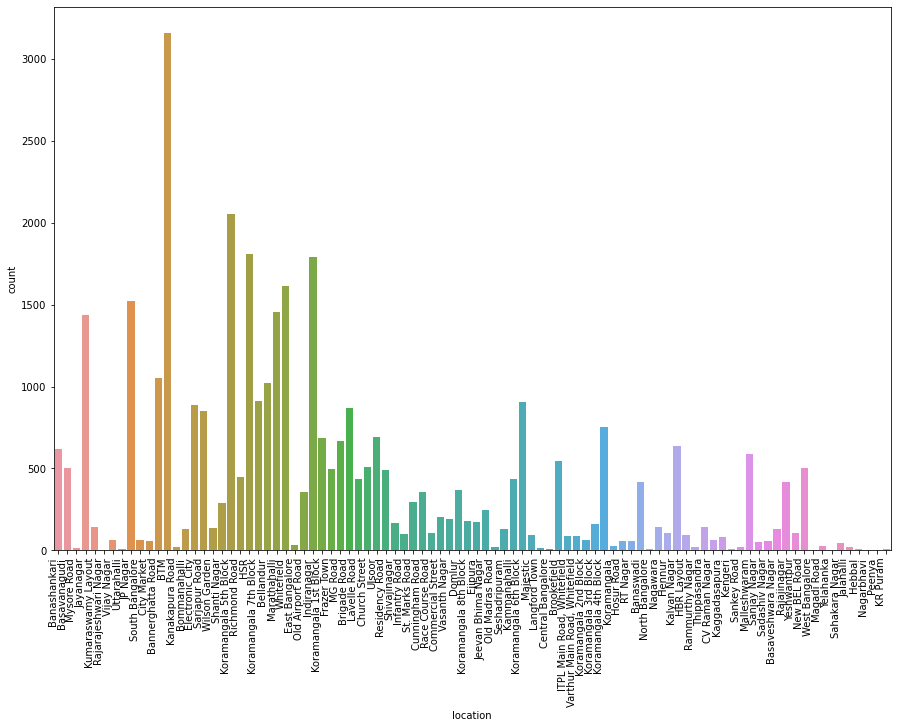

In [58]:
sns.countplot(data['location']).set_xticklabels(sns.countplot(data['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)

* Its very clear that BTM location have most restaurant are available

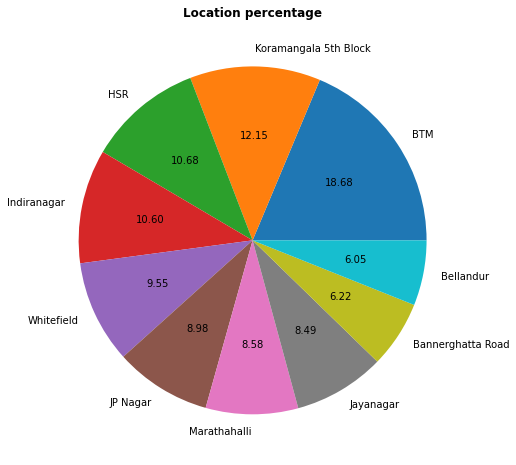

In [59]:
plt.figure(figsize=(8,8))
value = data.location.value_counts()[:10]
label = data['location'].value_counts()[:10].index
plt.pie(value, labels=label, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

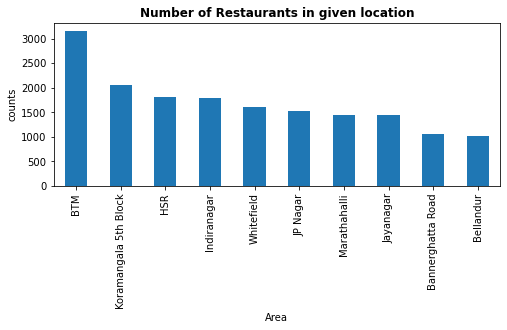

In [60]:

plt.figure(figsize=(8,3))
ax =data.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

* BTM area has around 3000 restaurants

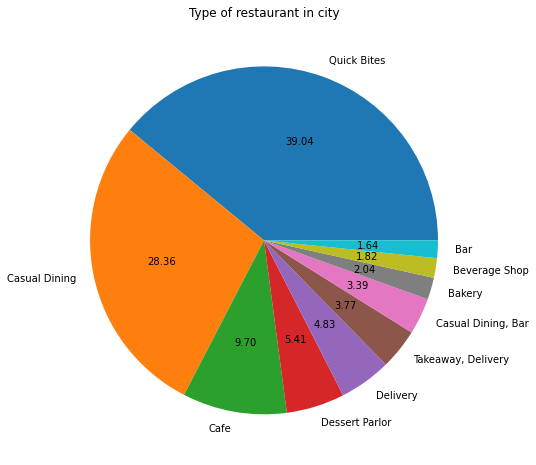

In [61]:
# Types of restaurant available in  banglore with percentage.

plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data.rest_type.value_counts()[:10].index
plt.pie(values,labels=labels,autopct='%.2f')
plt.title('Type of restaurant in city')
plt.show()

In [62]:
# Famouns or favourite dish in restaurants.

data.dish_liked.nunique()

data1 = data.copy()
dishes_data = data1[data1.dish_liked.notnull()]

dishes_data['dish_liked'] = dishes_data['dish_liked'].apply(lambda x : x.lower().strip())
print(dishes_data.isnull().sum())
print(dishes_data['dish_liked'][:10])

#Checking how many times each dish repeates.
dish_count = []
for i in dishes_data['dish_liked']:
    for t in i.split(','):
        t = t.strip()
        dish_count.append(t)
        
dish_count[:10]

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
process_text         0
dtype: int64
0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object


['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

Text(0, 0.5, 'count')

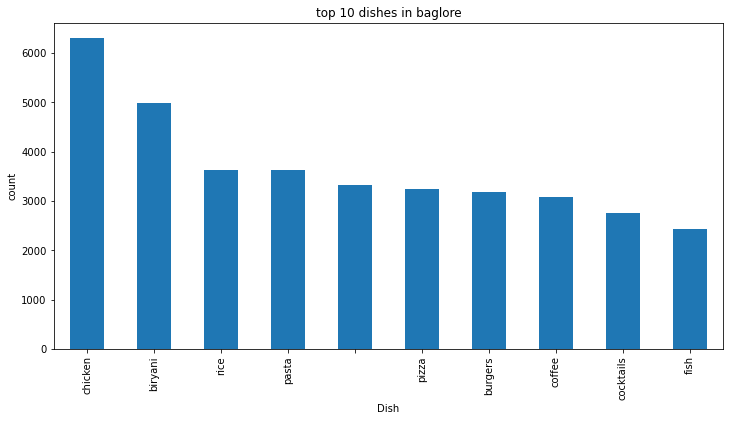

In [63]:
plt.figure(figsize = (12,6))
pd.Series(dish_count).value_counts()[:10].plot(kind = 'bar')
plt.title('top 10 dishes in baglore')
plt.xlabel('Dish')
plt.ylabel('count')

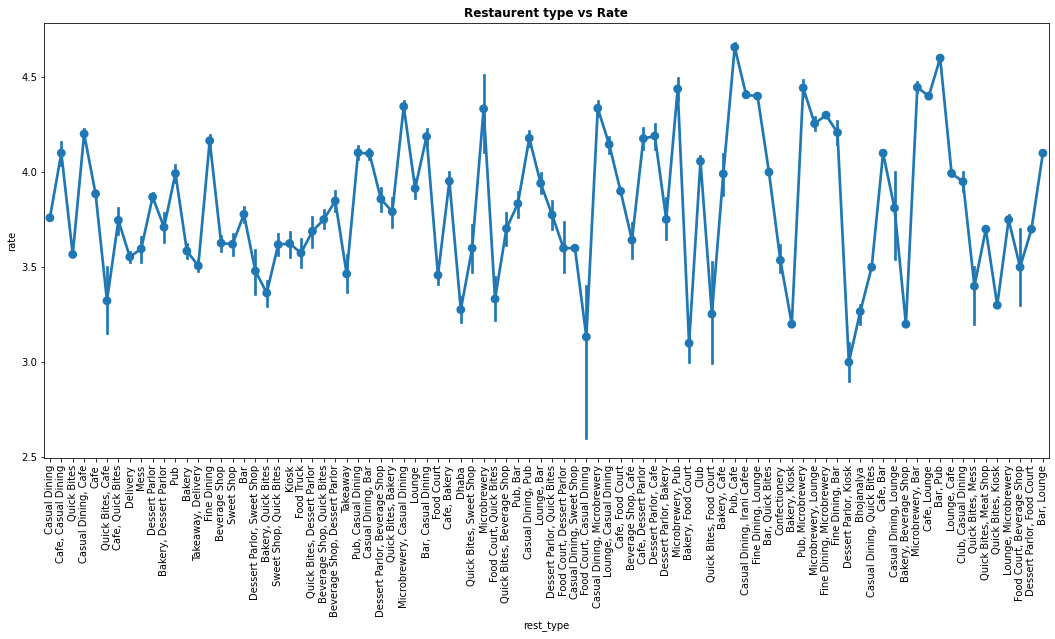

In [64]:
#  Rate vs Restaurant

f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

Text(0.5, 1.0, 'rate vs oline order')

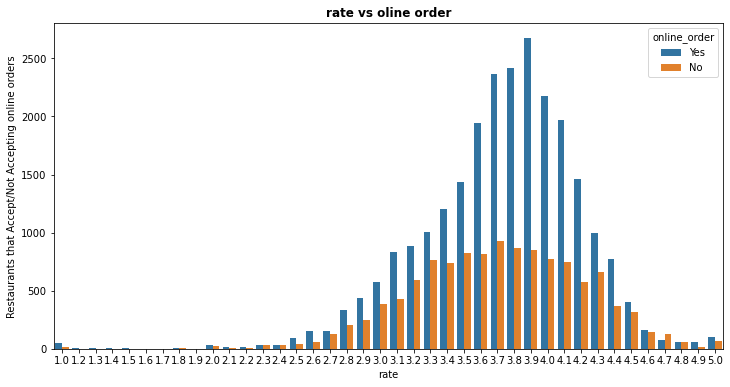

In [65]:
# rating vs online order

plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

# Model Building

In [66]:
data['online_order'] = pd.get_dummies(data.online_order, drop_first=True)
data['book_table'] = pd.get_dummies(data.book_table, drop_first=True)

In [67]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,ambience is not that good enough and it's not ...


In [68]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'process_text'],
      dtype='object')

In [69]:
# drop redudant columns
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'],inplace = True)

In [70]:
# removed ',' between two words; then converted to categorical features

data['rest_type'] = data['rest_type'].str.replace(',','')
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x:' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       12006
Casual Dining      8720
Cafe               2982
Dessert Parlor     1665
Delivery           1486
Name: rest_type, dtype: int64

In [71]:
# removed ',' between two words; then converted to categorical features

data['cuisines'] = data['cuisines'].str.replace(',','')
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x:' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Chinese Indian North                 1956
Indian North                         1907
Indian South                         1034
Chinese Indian Indian North South     941
Bakery Desserts                       698
Name: cuisines, dtype: int64

In [72]:
# removed ',' between two words; then converted to categorical features

data['average_cost'] = data['average_cost'].str.replace(',','')
data['average_cost'] = data['average_cost'].astype(int)

In [73]:
x = data.drop (['rate','name','process_text'],axis = 1)
y = data['rate']

# Train Test split for Model Building

In [74]:
## random_state :-Controls the shuffling applied to the data before applying the split.
    #Pass an int for reproducible output across multiple function calls.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=33)

In [75]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
34072,0,1,1390,Koramangala 5th Block,Lounge,Continental Indian North,1400
51088,1,1,1218,Whitefield,Pub,American Asian Mexican,1200


In [76]:
enc = OneHotEncoder( handle_unknown='ignore')
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [77]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rest_type = one_hot_fit_transform(X_train,'rest_type' )
te_dummy_rest_type= one_hot_transform(X_test,'rest_type' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'location' )
te_dummy_city= one_hot_transform(X_test,'location')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines=one_hot_transform(X_test,'cuisines')

In [78]:
print(tr_dummy_rest_type.shape, te_dummy_rest_type.shape)
print(tr_dummy_city.shape, te_dummy_city.shape)
print(tr_dummy_cuisines.shape, te_dummy_cuisines.shape)

(25782, 67) (11050, 67)
(25782, 92) (11050, 92)
(25782, 1674) (11050, 1674)


In [79]:
# combining one hot encoding data for training

tr =pd.DataFrame(pd.np.column_stack([ tr_dummy_rest_type,tr_dummy_city, tr_dummy_cuisines]))


l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(25782, 1840)

In [80]:
# combining one hot encoding data for testing

te =pd.DataFrame(pd.np.column_stack([ te_dummy_rest_type,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(11050, 1840)

In [81]:
# Droping the variable used for one hot
X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [82]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25782, 1837) (25782,)
(11050, 1837) (11050,)


In [83]:
X_train.head()

,online_order,book_table,votes,average_cost,0,1,2,3,4,5,...,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832
0,0,1,1390,1400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1218,1200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,34,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1880,900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,216,1200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:

from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)
mse_scorer

make_scorer(mse, greater_is_better=False)

# 1. Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

lr_ypred = lr.predict(X_test)
mse(y_test,lr_ypred)

0.12780356343784194

# 2. Stokastic Gradient Descent Regresson

In [92]:
from sklearn import linear_model
SGDRessor = linear_model.SGDRegressor()
SGDRessor = SGDRessor.fit(X_train,y_train)

SGDRessor_pred = SGDRessor.predict(X_test)
mse(y_test,SGDRessor_pred)

1.4755281304729823e+29

# 3. Gradient Boosting Regressor

In [93]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1, eval_metric='rmse', random_state=1,verbose_eval=10)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

mse(y_test, y_pred_xgb)

[22:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.





KeyboardInterrupt



# 4. RandomForest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

RF_Reg = RandomForestRegressor()
RF_Reg.fit(X_train,y_train)

RF_Reg_pre = RF_Reg.predict(X_test)
mse(y_test, RF_Reg_pre)

0.03480042606845398

# MSE = 0.0348 , It is good Model 

# Not Null Features only
Till now, we have considered <b>ONE-HOT</b> encoding of on below features.

* rest_type
* location
* cuisines
* online_order
* book_table

Here we are going to include below features also,

* dish_liked
* cuisines

Obviously we have to deal with large features set.

In [8]:
onehot = pd.read_csv('zomato.csv')
print(onehot.shape)
onehot.head(2)

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
print("Duplicates :", onehot.duplicated().sum())
onehot.drop_duplicates(inplace=True)
print("Duplicates :", onehot.duplicated().sum())

Duplicates : 0
Duplicates : 0


#### this time we will drop NULL values compared to last time

In [10]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN)
onehot['rate'] = onehot['rate'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex=True)

onehot['rate'] = onehot['rate'].astype(str)
onehot['rate'] = onehot['rate'].apply(lambda r:r.replace('/5',''))
onehot['rate'] = onehot['rate'].apply(lambda r:float(r))

In [11]:
# In cuisines remove ',' between words and convert to categorical feature

onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') # replace ',' with '' string
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split()))) # add white space
onehot['cuisines'].unique() # find unique values

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [12]:

# In Rest_type remove ',' between two words; then converted to categorical features

onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [13]:
# In dish_liked remove ',' between words and convert categorical featuire

onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            179
Friendly Staff      68
Waffles             67
Biryani Chicken     66
Paratha             56
Name: dish_liked, dtype: int64

In [14]:
# removed ',' between two words; then converted string to int value

onehot['approx_cost(for two people)'] = onehot['approx_cost(for two people)'].str.replace(',' , '') 
onehot.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [15]:

x = onehot.drop(['rate','name'],axis = 1)
y = onehot['rate']

#### Train Test Split

In [16]:
train_data,test_data,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [17]:
print(train_data.shape)
print(test_data.shape)

(16132, 15)
(6914, 15)


In [18]:
test_data.isnull().sum()

url                0
address            0
online_order       0
book_table         0
votes              0
phone              0
location           0
rest_type          0
dish_liked         0
cuisines           0
average_cost       0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

# Feature Engineering

In [19]:
train_data.insert(2, 'Rate', y_train, allow_duplicates = False)


In [20]:
print(train_data.shape)
train_data.head()

(16132, 16)


,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",3.9,Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block
5935,https://www.zomato.com/bangalore/brownie-heave...,"110-A, Westminister Building, Cunningham Road,...",4.2,Yes,No,33,080 43747949\r\n+91 9742023272,Cunningham Road,Dessert Parlor,Brownie Brownie Chocolate Chocolate Chocolate ...,Desserts Fast Food,300,"[('Rated 4.0', ""RATED\n So we wanted to have ...","['Eggless Classic Brownie', 'Classic Brownie',...",Desserts,Brigade Road
11546,https://www.zomato.com/bangalore/jw-kitchen-jw...,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",4.4,No,Yes,2119,080 49652886,Lavelle Road,Dining Fine,Breakfast Buffet Cake Chicken Chocolate Lasagn...,Continental Indian Italian North,2200,"[('Rated 4.0', 'RATED\n Went there for Saturd...",[],Buffet,Church Street
17899,https://www.zomato.com/bangalore/vinnys-brigad...,"3rd Floor, Guarda Mall, Ashok Nagar, Near Brig...",3.9,Yes,No,205,+91 8951237163,Brigade Road,Casual Dining,Fries Mocktails Mozzarella Pasta Pizza Salad S...,Continental Desserts Italian Pizza,800,"[('Rated 3.0', ""RATED\n Ordered one custom pi...",[],Delivery,Indiranagar
50256,https://www.zomato.com/bangalore/chai-point-br...,"296, 60 Ft Main Road, A Block, AECS Layout, Ku...",3.9,Yes,No,131,+91 8880141000,Brookefield,Beverage Bites Quick Shop,Banana Cake Cake Chai Coffee Ginger Ginger Poh...,Beverages Fast Food,250,"[('Rated 4.0', ""RATED\n My sunday mornings do...",[],Delivery,Whitefield


In [21]:
# Re-Insert 'rate' column in test dataframe.
test_data.insert(2, 'Rate', y_test, allow_duplicates = False)
test_data.shape

(6914, 16)

In [22]:
# # https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/

key_dict = dict()
def provide_response_coded_features(groupByVal,columnName, df):
    
    '''
    This function is used to convert categorical features into response coded features.
    It simply perform MEAN VALUE REPLACEMENT.
    '''
    
    ## distribute values group by n take mean of rate column
    mean_df = df.groupby([groupByVal]).mean()
    ## stored in dict data type.. key is column name and values in mean value of rate column.
    mean_dict =mean_df['Rate'].to_dict()
    key_dict.update([ (groupByVal, mean_dict) ] )
    for k, v in mean_dict.items():
            mean_dict[k] = round(v,2)
    df[columnName] = df[groupByVal].map(mean_dict) 
    return df

In [23]:

# create response coded feature for 'online_order' feature.

mean_online_order =provide_response_coded_features('online_order','mean_online_order',train_data)
mean_online_order[['Rate','online_order','mean_online_order']][:3]

,Rate,online_order,mean_online_order
28653,3.9,Yes,3.89
5935,4.2,Yes,3.89
11546,4.4,No,3.93


In [24]:
train_data.head(1)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),listed_in(city),mean_online_order
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",3.9,Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,Andhra Biryani,500,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block,3.89


In [25]:

# create response coded feature for 'book_table' feature.

mean_book_table =provide_response_coded_features('book_table','mean_book_table',train_data)
mean_book_table[['Rate','book_table','mean_book_table']][:3]

,Rate,book_table,mean_book_table
28653,3.9,No,3.81
5935,4.2,No,3.81
11546,4.4,Yes,4.16


In [26]:

# create response coded feature for 'rest_type' feature.

mean_rest_type =provide_response_coded_features('rest_type','mean_rest_type',train_data)
mean_rest_type[['Rate','rest_type','mean_rest_type']][:3]

,Rate,rest_type,mean_rest_type
28653,3.9,Casual Dining,3.84
5935,4.2,Dessert Parlor,4.09
11546,4.4,Dining Fine,4.20


In [27]:
# create response coded feature for 'location' feature.

mean_location =provide_response_coded_features('location','mean_location',train_data)
mean_location[['Rate','location','mean_location']][:3]

,Rate,location,mean_location
28653,3.9,Koramangala 6th Block,3.94
5935,4.2,Cunningham Road,4.08
11546,4.4,Lavelle Road,4.22


In [28]:
# create response coded feature for 'cuisines' feature.

mean_cuisines =provide_response_coded_features('cuisines','mean_cuisines',train_data)
mean_cuisines[['Rate','cuisines','mean_cuisines']][:3]

,Rate,cuisines,mean_cuisines
28653,3.9,Andhra Biryani,3.88
5935,4.2,Desserts Fast Food,4.11
11546,4.4,Continental Indian Italian North,4.02


In [29]:
# create response coded feature for 'dish_liked' feature.

mean_dish_liked =provide_response_coded_features('dish_liked','mean_dish_liked',train_data)
mean_dish_liked[['Rate','dish_liked','mean_dish_liked']][:3]

,Rate,dish_liked,mean_dish_liked
28653,3.9,Biryani Biryani Biryani Biryani Biryani Dum Gu...,3.90
5935,4.2,Brownie Brownie Chocolate Chocolate Chocolate ...,4.19
11546,4.4,Breakfast Buffet Cake Chicken Chocolate Lasagn...,4.40


In [30]:
train_data.head(1)

,url,address,Rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,...,reviews_list,menu_item,listed_in(type),listed_in(city),mean_online_order,mean_book_table,mean_rest_type,mean_location,mean_cuisines,mean_dish_liked
28653,https://www.zomato.com/bangalore/kaaram-korama...,"11, Eat Street, 80 Feet Road, Opposite Indian ...",3.9,Yes,No,326,080 49653061\r\r\r\n+91 9742457293,Koramangala 6th Block,Casual Dining,Biryani Biryani Biryani Biryani Biryani Dum Gu...,...,"[('Rated 3.0', 'RATED\n Tried home delivery. ...","['Chicken Chilli Kabab', 'Chicken Garlic Kabab...",Dine-out,Koramangala 4th Block,3.89,3.81,3.84,3.94,3.88,3.9


#### TEST Mean

In [208]:
def return_dict_mean_value(query_feature):
    
    '''
    'key_dict' is dictionary object which has all the Categorical variable names store as KEY and its mean as VALUE.
    This is function is used to return mean value for query_feature.
    
    KEY ==> 
    Value ==> Mean value response to that key
    
    query_feature ==>  Desired key
    Return ==> Categorical feature and their corresponding mean values. 
    '''
    
    result_dict=dict()

    for feature_name, values in key_dict.items():    
        if feature_name == query_feature:
            for key in values:
                result_dict.update([ (key, values[key]) ] )

                print(key + ':', values[key])
    return result_dict
return_dict_mean_value('online_order')

No: 3.93
Yes: 3.89


{'No': 3.93, 'Yes': 3.89}

In [209]:
dict_online = return_dict_mean_value('online_order')
dict_book_table = return_dict_mean_value('book_table')
dict_rest_type = return_dict_mean_value('rest_type')
dict_location = return_dict_mean_value('location')
dict_cuisines = return_dict_mean_value('cuisines')
dict_dish_liked = return_dict_mean_value('dish_liked')

No: 3.93
Yes: 3.89
No: 3.81
Yes: 4.16
Bakery: 3.93
Bakery Bites Quick: 3.49
Bakery Cafe: 3.99
Bakery Dessert Parlor: 4.01
Bar: 3.98
Bar Bites Quick: 4.0
Bar Cafe: 4.1
Bar Casual Dining: 4.18
Bar Dining Fine: 4.22
Bar Lounge: 3.94
Bar Microbrewery: 4.45
Bar Pub: 4.03
Beverage Bites Quick Shop: 3.94
Beverage Cafe Shop: 3.8
Beverage Dessert Parlor Shop: 4.0
Beverage Shop: 4.01
Bites Cafe Quick: 3.75
Bites Court Food Quick: 3.6
Bites Dessert Parlor Quick: 3.8
Bites Quick: 3.74
Bites Quick Shop Sweet: 3.8
Cafe: 3.99
Cafe Casual Dining: 4.19
Cafe Dessert Parlor: 4.19
Cafe Lounge: 4.21
Cafe Pub: 4.65
Cafee Casual Dining Irani: 4.4
Casual Club Dining: 3.95
Casual Court Dining Food: 2.6
Casual Dining: 3.84
Casual Dining Lounge: 4.09
Casual Dining Microbrewery: 4.36
Casual Dining Pub: 4.14
Club: 4.07
Court Food: 3.66
Delivery: 3.76
Delivery Takeaway: 3.78
Dessert Parlor: 4.09
Dhaba: 3.6
Dining Fine: 4.2
Dining Fine Lounge: 4.4
Dining Fine Microbrewery: 4.3
Food Truck: 3.6
Kiosk: 3.94
Lounge: 3.9

Beverages Cafe Fast Food Tea: 4.45
Beverages Cafe Food Healthy: 4.17
Beverages Cafe Food Healthy Juices: 4.1
Beverages Cafe Food Healthy Salad: 4.14
Beverages Cafe Italian: 3.7
Beverages Cafe Italian Mexican Momos: 4.2
Beverages Cafe Pizza: 4.6
Beverages Cafe Salad Wraps: 4.2
Beverages Cafe Tea: 2.8
Beverages Charcoal Chicken Chinese Indian Indian Kerala North Seafood South: 3.76
Beverages Chinese: 4.0
Beverages Chinese Coffee Fast Food: 3.9
Beverages Chinese Continental Fast Food: 3.89
Beverages Chinese Desserts Fast Food Food Indian Indian North South Street: 2.8
Beverages Chinese Fast Food Food Street: 4.0
Beverages Chinese Fast Food Indian North: 3.3
Beverages Chinese Fast Food Indian North Rolls: 3.9
Beverages Chinese Food Indian Indian North South Street: 3.68
Beverages Chinese Food Indian Mithai North Street: 4.24
Beverages Chinese Food Indian North Street: 4.2
Beverages Chinese Food Street: 3.8
Beverages Chinese Indian Indian North South: 3.71
Beverages Chinese Indian Kebab Nor

Chinese Japanese Thai: 4.13
Chinese Kebab Mughlai: 3.44
Chinese Kerala: 3.53
Chinese Kerala Mughlai: 3.27
Chinese Kerala Seafood: 4.0
Chinese Lucknowi: 3.5
Chinese Malaysian: 4.1
Chinese Malaysian Seafood Thai: 3.7
Chinese Malaysian Singaporean Thai: 4.3
Chinese Mangalorean Seafood: 4.2
Chinese Momos: 3.98
Chinese Momos Nepalese Tibetan: 3.9
Chinese Momos Seafood: 3.77
Chinese Momos Seafood Thai: 3.9
Chinese Momos Thai: 3.89
Chinese Momos Thai Vietnamese: 3.79
Chinese Momos Tibetan: 4.09
Chinese Mughlai: 3.85
Chinese Naga: 4.0
Chinese Pizza Rolls: 3.3
Chinese Rolls: 3.89
Chinese Seafood: 4.21
Chinese Seafood Thai: 3.75
Chinese Thai: 3.78
Chinese Thai Vietnamese: 4.1
Chinese Tibetan: 3.14
Chinese Turkish: 3.4
Coffee Food Street: 3.9
Coffee Indian South: 4.05
Continental: 3.89
Continental Desserts: 4.6
Continental Desserts Fast Food: 4.0
Continental Desserts Italian Pizza: 4.0
Continental European: 4.47
Continental European Fast Food: 4.4
Continental European Indian Indian North South: 4

Aloo Brownie Custard Mutton Mutton Rasmalai Salads Seekh Soup Tandoori: 4.2
Aloo Bruschettas Chicken Chicken Kabab Kalmi Lababdar Lassi Malai Paneer Tandoori Tandoori Tikka: 4.0
Aloo Buffet Buttermilk Chaat Dahi Gobhi Mocktails Salads Vada Veg: 4.3
Aloo Burger Burgers Cheese Maggi Poha Sandwich Sandwiches: 4.0
Aloo Burger Chai Chat Chicken Ginger Kebab Paneer Samosa Samosa Samosa Tea: 4.0
Aloo Burgers Butter Chicken Gulab Jamun Momos Mutton Noodles Paratha Roganjosh: 3.9
Aloo Butter Buttermilk Chaap Lassi Masala Masala Naan Paneer Panneer Paratha Soya Stuffed Tikka: 4.2
Aloo Butter Buttermilk Chaap Lassi Masala Masala Naan Paneer Panneer Paratha Soya Tikka: 4.2
Aloo Butter Chicken Chicken Coffee Dum Kadhai Murgh Pasta Pomfret Tandoori Tandoori Toffee: 4.52
Aloo Butter Chicken Chicken Dal Fry Garlic Lassi Naan Palak Paneer Paratha Tandoori: 2.3
Aloo Butter Chicken Chicken Jeera Makhani Mutton Paneer Paratha Roganjosh Tandoori: 3.5
Aloo Butter Chicken Paratha Roti: 4.1
Aloo Butter Kofta 

Arrangement Biryani Dal Makhani Outdoor Sitting Thali Veg Vegetable: 3.0
Arsalan Biryani Chicken Firni Legendary Masala Murgh Mutton Phirni Roll Rolls Tandoori: 3.5
Arugula Avocado Pasta Protein Salad Salads Sandwich Sandwiches Smoothie Spaghetti: 4.08
Arugula Brownie Cheese Cheesecake Chicken Chilli Salad Salads Sandwich Spaghetti Toast: 4.1
Arugula Cheese Cheesecake Chicken Chilli Pasta Salad Salads Sandwich Spaghetti Toast: 4.1
Arugula Cheese Cheesecake Chicken Chilli Salad Salads Sandwich Sandwiches Spaghetti Toast: 4.1
Asparagus Bisque Brulee Creme Lobster Pasta Ravioli Soup Tiramisu Wine: 4.3
Asparagus Bisque Cocktails Lamb Lobster Lobster Pork Pulled Risotto Risotto Soup Tom Yum: 4.2
Asparagus Bruschettas Cappuccino Coffee Pizza Salads Sandwiches Soup Woodfire: 4.0
Au Beer Biryani Burgers Gratin Masala Noodles Pasta Peanuts: 3.63
Au Burger Burgers Chicken Chicken Gratin Minestrone Pasta Pizza Soup Soup Veggie: 4.0
Augratin Bread Corn Fries Garlic Lasagne Mexican Pili Pili Pizza 

Beer Cocktails Craft Dahi Food Ke Kebab Pasta Platter Prawns Sea Tandoori Tempura: 4.2
Beer Cocktails Curry Khao Malacca Mocktails Salad Sangria Suey: 4.5
Beer Cocktails Draught: 3.9
Beer Cocktails Dumpling Dumplings Mushroom Noodles Pork Ribs Roll Singapore Spring Wheat: 4.2
Beer Cocktails Fish Iced Island Long Mocktails Sangria Soup Tea Tom Yum: 4.2
Beer Cocktails French Fries Martini: 3.6
Beer Cocktails Fries Iced Island Keema Lababdar Long Nachos Paneer Pav Peri Peri Tea: 4.3
Beer Cocktails Fries Mocktails Nachos: 4.1
Beer Cocktails Fries Nachos Pizza Stout Tiramisu: 4.3
Beer Cocktails Masala Peanuts: 3.7
Beer Cocktails Mash Nachos Pasta Pizza Potato Wings: 4.4
Beer Cocktails Mocktails Pasta Pizza: 3.9
Beer Cocktails Mocktails Pizza Sushi: 4.1
Beer Cocktails Nachos Pizza Pork Ribs Stout Tiramisu: 4.3
Beer Cocktails Paneer Tikka: 4.1
Beer Cocktails Roll Spring: 4.0
Beer Craft Kheer Kulcha Lamb Mango Margarita Mutton Paneer Raan Tikki: 4.2
Beer Curry Mashed Pork Pork Pork Potato Smok

Biryani Biryani Chicken Chicken Chilli Curry Donne Gundappa Mutton: 3.8
Biryani Biryani Chicken Chicken Chilli Mutton Omelette: 4.0
Biryani Biryani Chicken Chicken Chops Donne Fry Mutton: 4.0
Biryani Biryani Chicken Chicken Chops Jeera Kheer Mutton Mutton Phirni Rice Sholay: 3.5
Biryani Biryani Chicken Chicken Chops Mutton Mutton Mutton Pahari Raita Roganjosh Shawarma: 2.8
Biryani Biryani Chicken Chicken Chukka Dindigul Dosa Kothu Mutton Paratha Plain: 3.33
Biryani Biryani Chicken Chicken Curry Dosa Food Mutton Naan Neer Roti Sea: 4.0
Biryani Biryani Chicken Chicken Dal Fry Ghee Haleem Kebab Lassi Mutton Rice: 4.0
Biryani Biryani Chicken Chicken Dum Lemon Mutton: 3.72
Biryani Biryani Chicken Chicken Egg Fish Gulab Jamun Kulcha Lollipop Raita Stuffed: 4.0
Biryani Biryani Chicken Chicken Firni Kebab Mutton Naan Raita Rolls Tikka: 2.6
Biryani Biryani Chicken Chicken Fry Gulab Guntur Halwa Jamun Mutton Pepper Prawn Thali: 4.1
Biryani Biryani Chicken Chicken Fry Thalassery: 3.9
Biryani Biry

Biryani Butter Butter Dal Fry Kulcha Masala Paneer Paneer Panneer Roti Shahi Tikka Vegetable: 4.0
Biryani Butter Chaach Chicken Chicken Dal Kulcha Makhani Paratha Tandoori: 3.7
Biryani Butter Chaach Chicken Chicken Dal Lassi Makhani Paratha Tandoori: 3.7
Biryani Butter Chaat Chai Chicken Kullad Lababdar Masala Masala Paneer Panneer Papdi Tea Tikka: 3.8
Biryani Butter Chaat Chicken Coffee Cosmopolitan Dal Makhani Salads: 4.1
Biryani Butter Chana Chicken Chicken Lassi Masala Meetha Paan Paan Sweet Sweet Tandoori Vegetable: 4.1
Biryani Butter Chatpata Chicken Chicken Chicken Kulcha Lababdar Masala Paneer Paneer Panneer Shahi Tandoori: 4.0
Biryani Butter Chawal Chicken Chicken Maggi Naan Noodles Pasta Rajma: 3.48
Biryani Butter Cheese Kulcha Kulfi Lassi Naan Palak Paneer Sweet Thali: 3.8
Biryani Butter Chicken Chicken: 3.79
Biryani Butter Chicken Chicken Chicken Chicken Chicken Chilli Dum Fiery Grill Masala Paneer Pepper Tikka: 4.1
Biryani Butter Chicken Chicken Chicken Chicken Chicken Chi

Bread Garlic Pasta: 3.1
Bread Garlic Pasta Pizza: 3.2
Bread Garlic Pasta Pizza Ravioli Salad Salads Wine: 4.5
Bread Garlic Pizza: 3.68
Bread Garlic Pizza Supreme Veg: 2.2
Bread Garlic Roll Sandwiches Sausage: 3.7
Bread Garlic Stuffed: 2.7
Bread Pita Shawarma: 3.5
Breads Cappuccino Cheesecake: 3.7
Breakfast Breakfast Brunch Burgers Caesar Enchiladas English Healthy Omelette Salad Sunday: 4.1
Breakfast Breakfast Burger Burgers Caesar Egg Enchiladas English Healthy Omelette Salad: 4.1
Breakfast Breakfast Burgers Crepe English Healthy Omelette Pancakes Sandwiches: 4.0
Breakfast Breakfast Burgers English Healthy Mushroom Omelette Pancakes Sandwiches Waffles: 4.6
Breakfast Brewed Brownie Cappuccino Cinnamon Coffee English Fries Roll Wings: 4.3
Breakfast Brunch Buffet Buffet Lamb Lunch Pasta Pizza Shawarma Sunday: 4.1
Breakfast Brunch Buffet Chaat Mocktails Omelette Pizza Salads Sunday: 3.9
Breakfast Brunch Buffet Club Cocktails Fish Juice Salads Sandwich Sunday Watermelon: 3.9
Breakfast Brun

Burgers Fries Lassi Methi Nachos Paratha Rolls Sandwiches Sweet: 3.9
Burgers Fries Maggi Pasta Sandwiches: 3.4
Burgers Fries Nachos: 3.6
Burgers Fries Pasta Pizza: 3.9
Burgers Fries Pasta Wings: 4.0
Burgers Fries Peri Peri: 2.75
Burgers Fry Liver Pizza: 3.8
Burgers Ice-cream Maggi Pasta Shake: 3.7
Burgers Lassi Momos Nachos Paratha Pasta Sandwiches: 3.9
Burgers Lassi Momos Nachos Paratha Potato Sandwiches Wedges: 3.9
Burgers Maggi Momos Sandwiches Shakes Thick Veg: 4.0
Burgers Malai Murgh Oreo Shake: 3.1
Burgers Manchurian Mocktails Momos Nachos Noodles Paneer Paneer Paneer Patiala Schezwan: 4.0
Burgers Mango Nachos Pizza Roll Rolls Sandwiches Shake Veggie: 4.1
Burgers Mocktails Nachos Pasta Pizza Shakes Thick Wedges: 4.2
Burgers Mocktails Paneer Pasta Pavbhaji Pesto Pizza Salad Sandwiches Tikka: 4.4
Burgers Mocktails Paneer Pasta Pavbhaji Pizza Salad Sandwiches Tikka: 4.3
Burgers Momos Nachos Pasta Pizza: 3.9
Burgers Nachos Pizza Red Roll Rolls Sandwiches Shake Veggie Velvet: 4.1
Burg

Chicken Chicken Chocolate Fantasy Paneer Roll Rolls Veggie Wrap Wrap Wrap: 3.9
Chicken Chicken Chole Jumbo Rolls Veggie Wrap Wrap: 4.0
Chicken Chicken Chop Chowmein Clear Fried Manchow Momos Noodles Roll Soup Soup Spring Suey: 4.0
Chicken Chicken Chop Dragon Fung Hunan Lung Noodles Prawn Roll Soup Spring Suey: 4.0
Chicken Chicken Chop Dragon Lollipop Suey: 4.0
Chicken Chicken Chop Drunken Fried Golden Manchurian Mushroom Noodles Prawns Roll Satay Spring Suey Wings: 3.8
Chicken Chicken Chops Curry Curry Dosa Fish Mutton Mutton Neer Pepper: 3.8
Chicken Chicken Chowmein Clear Corn Hakka Hunan Lamb Lollipop Noodles Soup Soup Sweet: 4.0
Chicken Chicken Chunks Keema Paneer Peri Peri Pizza Pizza: 3.9
Chicken Chicken Clear Crispy Hakka Kung Lime Manchow Noodles Noodles Pao Singapore Soda Soup Soup Veg: 4.2
Chicken Chicken Club Lasagne Mocktails Mojito Nachos Popcorn Sandwich Tiramisu Virgin: 4.3
Chicken Chicken Club Lasagne Mocktails Nachos Pasta Popcorn Sandwich Tiramisu: 4.3
Chicken Chicken 

Coffee Idli Vada: 3.8
Coffee Kadhai Paneer: 3.5
Coffee Key Lime Pasta Pie Pizza: 4.0
Coffee Khichda Khichdi Onion Pakoda Sabudana Samosa Sandwiches Tea: 4.2
Coffee Latte: 3.4
Coffee Latte Puff Veg: 2.9
Coffee Maggi: 3.7
Coffee Masala Opera Pastry Tea: 3.9
Coffee Mocktails Mojito Pasta Salads Sangria Virgin Wine: 4.25
Coffee Mocktails Nachos Pasta Pizza Salad Sandwiches: 4.0
Coffee Momos Papaya Pho Rolls Salad Veg: 3.6
Coffee Nachos Rolls Sandwiches Waffles: 3.98
Coffee Nutella Pasta Pizza Tea Waffle Waffles Wedges: 4.25
Coffee Pancakes Pasta Pizza Salads Tiramisu Waffles: 4.2
Coffee Pancakes Sandwich: 3.76
Coffee Pasta: 3.8
Coffee Pasta Pizza Quiche Salads Sandwiches Tea Veg: 4.1
Coffee Pasta Salads Sandwich Sandwiches Tea: 4.0
Coffee Pasta Sandwiches: 2.9
Coffee Pasta Tea: 4.2
Coffee Pav Roti Vada: 4.1
Coffee Potato Tea Wedges: 3.4
Coffee Potato Wedges: 4.0
Coffee Sandwich: 3.2
Coffee Sandwich Sandwiches: 2.74
Coffee Sandwiches Tea: 3.9
Coffee Thali: 3.5
Cone Waffle: 4.1
Coorg Pandi P

Masala Papad: 3.4
Matar Paneer: 3.7
Meat Rolls Shawarma Whole: 3.8
Meat Shawarma Whole: 3.9
Mexican Shawarma: 3.8
Milk Rasmalai Shake Shakes Thick: 2.9
Milk Shake Shakes Thick: 3.6
Minestrone Mocktails Mousse Pasta Pizza Sangria Soup Tiramisu: 4.3
Miso Ramen Rolls Soup Steak Sushi Tea Tempura: 4.3
Miso Soup Tempura: 4.3
Mississippi Mud: 3.9
Mocha Waffle Waffles: 3.8
Mocktails Nachos Pasta Pesto Pizza Risotto Salads Salsa Spinach: 4.3
Mocktails Pasta Pizza: 4.1
Mocktails Pasta Sandwiches Shakes Thick: 3.7
Momo Momos Nachos Pizza Platter Salad Salsa Vegetarian: 4.2
Momos: 3.9
Momos Noodles: 3.46
Momos Noodles Rice Schezwan: 3.7
Momos Noodles Roll Spring: 3.7
Momos Noodles Schezwan: 2.7
Momos Paneer Roll Roll Rolls Veggie: 3.7
Momos Shawarma: 3.9
Momos Thukpa Veg: 2.8
Momos Veg: 3.7
Mousse Noodles Pasta Pizza Salad Salads Sandwiches: 3.2
Mushroom Noodles Ramen: 4.15
Naan: 3.9
Naan Paneer Roti Shahi Shahi Tukda: 4.08
Naan Roti Rumali: 3.6
Noodle Pad Thai: 3.9
Noodles: 3.41
Noodles Paratha:

In [210]:
test_data['mean_online_order'] = test_data['online_order'].map(dict_online)

test_data['mean_book_table'] = test_data['book_table'].map(dict_book_table)

test_data['mean_rest_type'] = test_data['rest_type'].map(dict_rest_type)

test_data['mean_location'] = test_data['location'].map(dict_location)

test_data['mean_cuisines'] = test_data['cuisines'].map(dict_cuisines)

test_data['mean_dish_liked'] = test_data['dish_liked'].map(dict_dish_liked)

In [211]:
test_data.isnull().sum()

url                    0
address                0
Rate                   0
online_order           0
book_table             0
votes                  0
phone                  0
location               0
rest_type              0
dish_liked             0
cuisines               0
average_cost           0
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
mean_online_order      0
mean_book_table        0
mean_rest_type         2
mean_location          0
mean_cuisines         64
mean_dish_liked      489
dtype: int64

In [212]:
# we can just remoce these null values.

test_data.dropna(subset=['mean_dish_liked','mean_rest_type','mean_cuisines'],inplace=True)


In [213]:
test_data.isnull().sum()

url                  0
address              0
Rate                 0
online_order         0
book_table           0
votes                0
phone                0
location             0
rest_type            0
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
mean_online_order    0
mean_book_table      0
mean_rest_type       0
mean_location        0
mean_cuisines        0
mean_dish_liked      0
dtype: int64

In [214]:
y_test= test_data['Rate']


#### Delete Unwanted columns

In [215]:
train_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [216]:
test_data.drop(columns=['rest_type','location','cuisines','dish_liked','menu_item','url','phone','reviews_list','listed_in(type)','listed_in(city)','address','online_order','book_table','Rate'], inplace=True)

In [217]:
print(train_data.shape, y_train.shape)
print(test_data.shape, y_test.shape)

(16132, 8) (16132,)
(6405, 8) (6405,)


In [218]:
test_data.head()

,votes,average_cost,mean_online_order,mean_book_table,mean_rest_type,mean_location,mean_cuisines,mean_dish_liked
35957,1519,900,3.89,4.16,3.99,4.10,3.96,4.0
4975,48,1500,3.89,3.81,3.84,3.95,4.05,4.0
21830,144,550,3.93,3.81,3.99,3.62,3.90,3.9
11982,161,300,3.93,3.81,3.74,4.13,3.72,3.7
2597,693,750,3.89,3.81,3.84,3.80,3.55,3.8


In [219]:
test_data.head()

,votes,average_cost,mean_online_order,mean_book_table,mean_rest_type,mean_location,mean_cuisines,mean_dish_liked
35957,1519,900,3.89,4.16,3.99,4.10,3.96,4.0
4975,48,1500,3.89,3.81,3.84,3.95,4.05,4.0
21830,144,550,3.93,3.81,3.99,3.62,3.90,3.9
11982,161,300,3.93,3.81,3.74,4.13,3.72,3.7
2597,693,750,3.89,3.81,3.84,3.80,3.55,3.8


In [220]:
test_data.isnull().sum()

votes                0
average_cost         0
mean_online_order    0
mean_book_table      0
mean_rest_type       0
mean_location        0
mean_cuisines        0
mean_dish_liked      0
dtype: int64

### Random Forest

In [221]:
rfr = RandomForestRegressor()
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)


0.0031939279575558042

#### Best Model "Random forest Regreesion" best_params_

In [222]:

rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(train_data,y_train)
y_pred_rfr = rfr.predict(test_data)

mse(y_test, y_pred_rfr)

0.0031767161023309345

In [223]:
import pickle
# # Saving model to disk
pickle.dump(rfr, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
#print(y_pred_rfr)

### Testing

In [224]:
model = pickle.load(open('Random_Forest_model.pkl', 'rb'))

In [ ]:
dict_online = return_dict_mean_value('online_order')
dict_book_table = return_dict_mean_value('book_table')
dict_rest_type = return_dict_mean_value('rest_type')
dict_location = return_dict_mean_value('location')
dict_cuisines = return_dict_mean_value('cuisines')
dict_dish_liked = return_dict_mean_value('dish_liked')



test_data['mean_online_order'] = test_data['online_order'].map(dict_online)

test_data['mean_book_table'] = test_data['book_table'].map(dict_book_table)

test_data['mean_rest_type'] = test_data['rest_type'].map(dict_rest_type)

test_data['mean_location'] = test_data['location'].map(dict_location)

test_data['mean_cuisines'] = test_data['cuisines'].map(dict_cuisines)

test_data['mean_dish_liked'] = test_data['dish_liked'].map(dict_dish_liked)

In [228]:
# votes,average_cost,mean_online_order,mean_book_table,mean_rest_type,mean_location,mean_cuisines,mean_dish_liked

lst = [1519,900,3.89,4.16,3.99,4.10,3.96,4.0]
print(type(lst))
final_features = [np.array(lst)]

<class 'list'>


In [231]:
prediction = model.predict(final_features)
output = round(prediction[0], 1)

https://github.com/MrBriit/FLASK-End-to-end-Zomato-Restaurant-Price-Prediction-and-Deployment
    
https://github.com/pranaysawant/Zomato-Restaurant-Rate-Prediction/blob/master/Zomato%20Restaurant%20Rating%20Prediction.ipynb